# Ejercicio 4

In [230]:
import numpy as np

# Cargar los datos
D = np.load("archivo_01.npy")
N = len(D)

In [231]:
# Creación de los t
t = np.linspace(0, 1, N)

In [232]:
# Construir la matriz M
M = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])

# Resolver el sistema de ecuaciones normales
MT_M = M.T @ M
MT_D = M.T @ D
MT_M_inv = np.linalg.inv(MT_M)

# Obtener los puntos de control
P = MT_M_inv @ MT_D
print(P)

[[  1.27084129   4.49550443]
 [  7.4585432   14.17738292]
 [ 17.5902167  -16.26255991]
 [ 19.71207913   4.19096308]]


In [233]:
# Calcular el error cuadrático total
aproximacion = M @ P
error = np.sum((D - aproximacion)**2)
print(f"Error de aproximación: {error:.4f}")


Error de aproximación: 91.7137


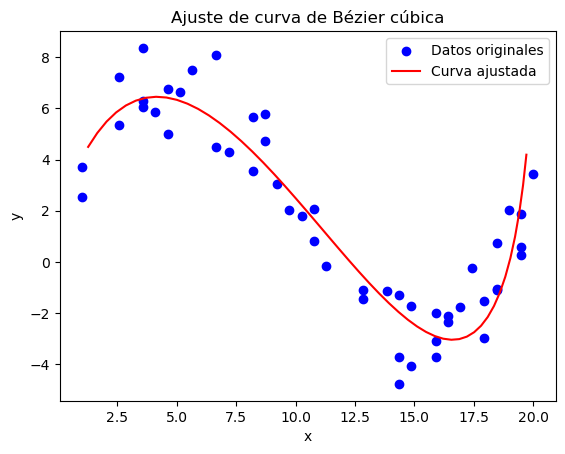

In [234]:
import matplotlib.pyplot as plt

# Graficar los puntos originales
plt.scatter(D[:, 0], D[:, 1], color='blue', label='Datos originales')

# Graficar la curva ajustada
plt.plot(aproximacion[:, 0], aproximacion[:, 1], color='red', label='Curva ajustada')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste de curva de Bézier cúbica')
plt.show()


# Ejercicio 5

In [235]:
# Cargar los datos
D = np.load("archivo_02.npy")
N = len(D)

In [236]:
# Creación de los t
t = np.linspace(0, 1, N)

In [237]:
# Construir la matriz M
M = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])

# Resolver el sistema de ecuaciones normales
MT_M = M.T @ M
MT_D = M.T @ D
MT_M_inv = np.linalg.inv(MT_M)

# Obtener los puntos de control
P = MT_M_inv @ MT_D
print(P)

[[ 240.0767367    13.72604701]
 [-283.50219685  443.45349569]
 [ 732.96834961  435.47031685]
 [ 202.42464715   14.09634786]]


In [238]:
# Calcular el error cuadrático total
aproximacion = M @ P
error = np.sum((D - aproximacion)**2)
print(f"Error de aproximación: {error:.4f}")

Error de aproximación: 417040.6086


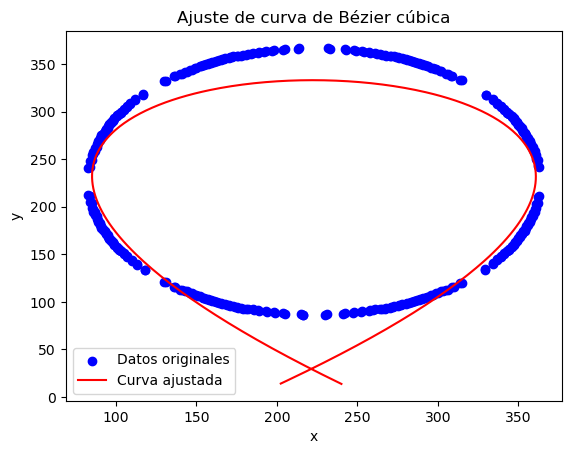

In [239]:
# Graficar los puntos originales
plt.scatter(D[:, 0], D[:, 1], color='blue', label='Datos originales')

# Graficar la curva ajustada
plt.plot(aproximacion[:, 0], aproximacion[:, 1], color='red', label='Curva ajustada')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste de curva de Bézier cúbica')
plt.show()

# Ejercicio 6

### División de los datos en dos grupos

In [240]:
#Buscar el punto medio de los datos para dividirlos en 2 grupos
media_x = np.mean(D[:, 0])

D_left = D[D[:, 0] < media_x]
D_right = D[D[:, 0] >= media_x]

In [241]:
Ms = [] # Matrices M
Ps = [] # Puntos de control de las curvas
# Para cada subconjunto de datos calcular M y P
for subset in [D_left, D_right]:
    # Construir la matriz M
    t = np.linspace(0, 1, len(subset))
    M_aux = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])
    Ms.append(M_aux)

    # Resolver los sistemas de ecuaciones normales
    MT_M_aux = M_aux.T @ M_aux
    MT_D_aux = M_aux.T @ subset
    MT_M_inv_aux = np.linalg.inv(MT_M_aux)

    # Obtener los puntos de control
    P_aux = MT_M_inv_aux @ MT_D_aux
    Ps.append(P_aux)


In [242]:
tags = {0: 'izquierda', 1: 'derecha'}
aproximaciones = []
error=0
for i, subset in enumerate([D_left, D_right]):
    aproximacion_aux = Ms[i] @ Ps[i]
    aproximaciones.append(aproximacion_aux)
    error_aux = np.sum((subset - aproximacion_aux)**2)
    error += error_aux
    print(f"Error de aproximación del conjunto {tags[i]}: {error_aux:.4f}")
print(f"Error de aproximación: {error:.4f}")

Error de aproximación del conjunto izquierda: 89733.2389
Error de aproximación del conjunto derecha: 21621.1076
Error de aproximación: 111354.3465


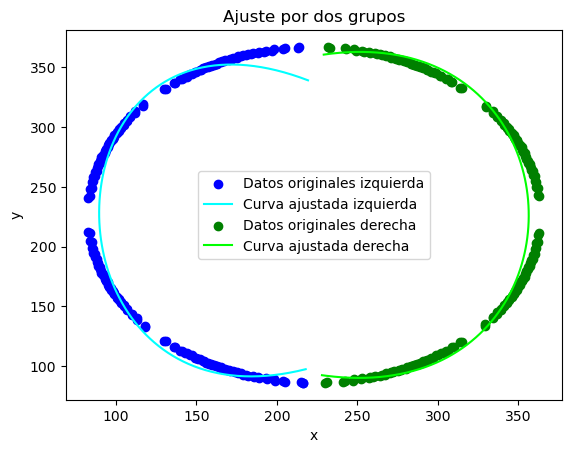

In [243]:
colors1 = {0: 'blue', 1: 'green'}
colors2 = {0: 'cyan', 1: 'lime'}
for i, subset in enumerate([D_left, D_right]):
    # Graficar los puntos originales de cada grupo
    plt.scatter(subset[:, 0], subset[:, 1], color=colors1[i], label=f'Datos originales {tags[i]}')

    # Graficar la curva ajustada de cada grupo
    plt.plot(aproximaciones[i][:, 0], aproximaciones[i][:, 1], color=colors2[i], label=f'Curva ajustada {tags[i]}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste por dos grupos')
plt.show()

### Agregando coninuidad $C^0$

In [244]:
# Funciones realizads en el TP1
def matriz_transformacion(puntos_p, puntos_q):
    p0 = np.array(puntos_p[0])
    p3 = np.array(puntos_p[3])
    q0 = np.array(puntos_q[0])
    q3 = np.array(puntos_q[3])
    if (p0[0] == 0 or p0[1]*p3[0] == p0[0]*p3[1]):
        print("La transformación no es posible")
        return
    denom = p0[1]*p3[0] - p0[0]*p3[1]
    a = (-1*p3[1]*q3[0] + p0[1]*q0[0]) / denom
    b = (p3[0]*q3[0] - p0[0]*q0[0]) / denom
    c = (-1*p3[1]*q3[1] + p0[1]*q0[1]) / denom
    d = (p3[0]*q3[1] - p0[0]*q0[1]) / denom
    return np.array([[a, b], [c, d]])

def coef_p3(t):
    return t**3

def coef_p2(t):
    return 3*t**2 - 3*t**3

def coef_p1(t):
    return 3*t**3 - 6*t**2 + 3*t

def coef_p0(t):
    return 3*t**2 - t**3 -3*t + 1

coef0 = np.array([coef_p0(t) for t in t])
coef1 = np.array([coef_p1(t) for t in t])
coef2 = np.array([coef_p2(t) for t in t])
coef3 = np.array([coef_p3(t) for t in t])
def bezier(t, puntos):
    p0 = puntos[0]
    p1 = puntos[1]
    p2 = puntos[2]
    if len(puntos) == 4:
        p3 = puntos[3]
        return coef_p3(t)*p3 + coef_p2(t)*p2 + coef_p1(t)*p1 + coef_p0(t)*p0
    elif len(puntos) == 3:
        return t**2*p2 + (2*t-2*t**2)*p1 + (t**2-2*t+1)*p0

In [245]:
for union in range(2):
    puntos1 = Ps[union]
    puntos2 = Ps[(union+1)%2]

    p3_1 = puntos1[-1]
    p3_2 = puntos2[0]

    medio_1 = (1/2) * (p3_1 + p3_2)

    puntos1[-1] = medio_1
    puntos2[0] = medio_1

aproximaciones = []
error = 0
for i, subset in enumerate([D_left, D_right]):
    aproximacion_aux = Ms[i] @ Ps[i]
    aproximaciones.append(aproximacion_aux)
    error_aux = np.sum((subset - aproximacion_aux)**2)
    error += error_aux
    print(f"Error de aproximación del conjunto {tags[i]}: {error_aux:.4f}")
print(f"Error de aproximación: {error:.4f}")

Error de aproximación del conjunto izquierda: 94708.0708
Error de aproximación del conjunto derecha: 26571.4980
Error de aproximación: 121279.5688


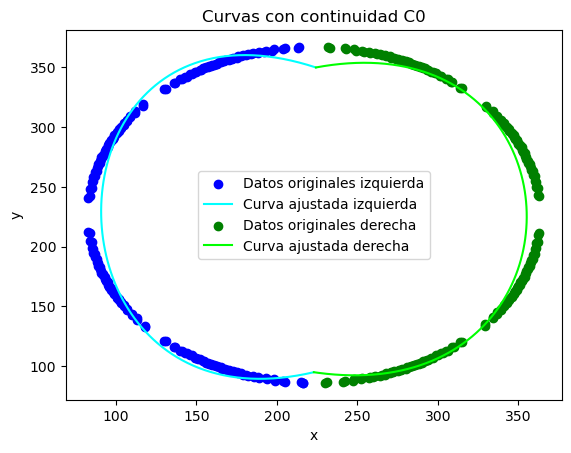

In [246]:
# Volver a graficar, ahora con continuidad C0

for i, subset in enumerate([D_left, D_right]):
    # Graficar los puntos originales de cada grupo
    plt.scatter(subset[:, 0], subset[:, 1], color=colors1[i], label=f'Datos originales {tags[i]}')

    # Graficar la curva ajustada de cada grupo
    plt.plot(aproximaciones[i][:, 0], aproximaciones[i][:, 1], color=colors2[i], label=f'Curva ajustada {tags[i]}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Curvas con continuidad C0')
plt.show()

### Agregando continuidad $C^1$

In [247]:
for union in range(2):
    puntos1 = Ps[union]
    puntos2 = Ps[(union+1)%2]

    p2 = puntos1[2]
    p4 = puntos2[1]

    medio_1 = (1/2) * (p2 + p4)

    puntos1[-1] = medio_1
    puntos2[0] = medio_1

aproximaciones = []
error = 0
for i, subset in enumerate([D_left, D_right]):
    aproximacion_aux = Ms[i] @ Ps[i]
    aproximaciones.append(aproximacion_aux)
    error_aux = np.sum((subset - aproximacion_aux)**2)
    error += error_aux
    print(f"Error de aproximación del conjunto {tags[i]}: {error_aux:.4f}")
print(f"Error de aproximación: {error:.4f}")

Error de aproximación del conjunto izquierda: 296448.3892
Error de aproximación del conjunto derecha: 143141.2615
Error de aproximación: 439589.6507


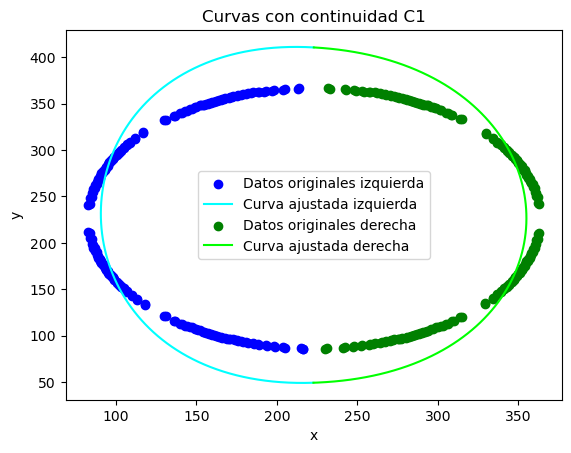

In [248]:
# Volver a graficar, ahora con continuidad C1
for i, subset in enumerate([D_left, D_right]):
    # Graficar los puntos originales de cada grupo
    plt.scatter(subset[:, 0], subset[:, 1], color=colors1[i], label=f'Datos originales {tags[i]}')

    # Graficar la curva ajustada de cada grupo
    plt.plot(aproximaciones[i][:, 0], aproximaciones[i][:, 1], color=colors2[i], label=f'Curva ajustada {tags[i]}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Curvas con continuidad C1')
plt.show()

### Subdivision en más subgrupos

In [249]:
#seccionar los datos en 15 sectores
# Supongamos que D contiene los datos originales (N x 2) con columnas [x, y]
x_min, x_max = np.min(D[:, 0]), np.max(D[:, 0])  # Rango de x
y_min, y_max = np.min(D[:, 1]), np.max(D[:, 1])  # Rango de y

# Dividir en 5 columnas y 3 filas
x_bins = np.linspace(x_min, x_max+1, 6)  # 5 columnas → 6 límites
y_bins = np.linspace(y_min, y_max+1, 4)   # 3 filas → 4 límites

# Categorizar datos en columnas (eje x) y filas (eje y)
x_indices = np.digitize(D[:, 0], x_bins) - 1  # Convertir a índices basados en 0
y_indices = np.digitize(D[:, 1], y_bins) - 1

# Asignar a sectores combinando fila y columna
sectores = y_indices * 5 + x_indices

Ds = {}
for i, s in enumerate(sectores):
    if s not in Ds:
        Ds[s] = []
    Ds[s].append(D[i])

In [250]:
Ms = {} # Matrices M
Ps = {} # Puntos de control de las curvas
# Para cada subconjunto de datos calcular M y P
for clave in Ds:
    # Construir la matriz M
    datos = Ds[clave]
    t = np.linspace(0, 1, len(datos))
    M_aux = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])
    Ms[clave] = (M_aux)

    # Resolver los sistemas de ecuaciones normales
    MT_M_aux = M_aux.T @ M_aux
    MT_D_aux = M_aux.T @ datos
    MT_M_inv_aux = np.linalg.inv(MT_M_aux)

    # Obtener los puntos de control
    P_aux = MT_M_inv_aux @ MT_D_aux
    Ps[clave]=P_aux

In [251]:
aproximaciones = {}
error = 0
for clave in Ds:
    aproximacion_aux = Ms[clave] @ Ps[clave]
    aproximaciones[clave] = aproximacion_aux
    error_aux = np.sum((Ds[clave] - aproximacion_aux)**2)
    error += error_aux
    print(f"Error de aproximación del conjunto {clave}: {error_aux:.4f}")
print(f"Error de aproximación del conjunto: {error_aux:.4f}")

Error de aproximación del conjunto 2: 1285.2670
Error de aproximación del conjunto 1: 10.9350
Error de aproximación del conjunto 0: 164.5182
Error de aproximación del conjunto 5: 821.7611
Error de aproximación del conjunto 10: 214.7717
Error de aproximación del conjunto 11: 11.3333
Error de aproximación del conjunto 12: 76.3836
Error de aproximación del conjunto 13: 12.7730
Error de aproximación del conjunto 14: 268.7611
Error de aproximación del conjunto 9: 936.7952
Error de aproximación del conjunto 4: 236.9209
Error de aproximación del conjunto 3: 12.6176
Error de aproximación del conjunto: 12.6176


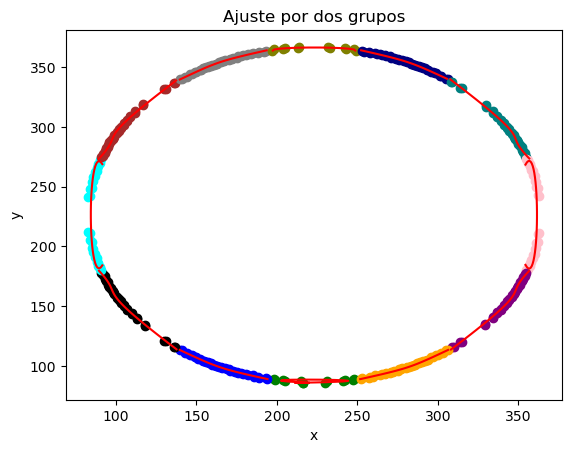

In [252]:
colors1 = {0: "black",1: "blue",2: "green",3: "orange",4: "purple",5: "cyan",6: "magenta",7: "yellow",8: "lime",9: "pink",10: "brown",11: "gray",12: "olive",13: "navy",14: "teal"}

colors2 = {0: 'cyan', 1: 'lime'}
for clave in Ds:
    subset = np.array(Ds[clave])
    # Graficar los puntos originales de cada grupo
    plt.scatter(subset[:, 0], subset[:, 1], color=colors1[clave], label=f'Datos originales {clave}')

    # Graficar la curva ajustada de cada grupo
    plt.plot(aproximaciones[clave][:, 0], aproximaciones[clave][:, 1], color='red', label=f'Curva ajustada {clave}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por dos grupos')
plt.show()

In [253]:
Ps_list = list(Ps.values())
for i in range(len(Ps_list)):
    puntos1 = Ps_list[i]
    puntos2 = Ps_list[(i+1)%len(Ps_list)]

    p2 = puntos1[2]
    p4 = puntos2[1]

    medio_1 = (1/2) * (p2 + p4)

    Ps_list[i][-1] = medio_1
    Ps_list[i][0] = medio_1

error = 0
aproximaciones = {}
for i, clave in enumerate(Ds):
    aproximacion_aux = Ms[clave] @ Ps_list[i]
    aproximaciones[clave] = aproximacion_aux
    error_aux = np.sum((Ds[clave] - aproximacion_aux)**2)
    error += error_aux
    print(f"Error de aproximación del conjunto {clave}: {error_aux:.4f}")

print(f"Error de aproximación: {error:.4f}")

Error de aproximación del conjunto 2: 3675.7061
Error de aproximación del conjunto 1: 49776.5797
Error de aproximación del conjunto 0: 24293.8005
Error de aproximación del conjunto 5: 65791.7454
Error de aproximación del conjunto 10: 21019.9035
Error de aproximación del conjunto 11: 13742.4873
Error de aproximación del conjunto 12: 11106.9277
Error de aproximación del conjunto 13: 52217.0250
Error de aproximación del conjunto 14: 24074.1379
Error de aproximación del conjunto 9: 67452.9601
Error de aproximación del conjunto 4: 20854.6677
Error de aproximación del conjunto 3: 61358.3175
Error de aproximación: 415364.2582


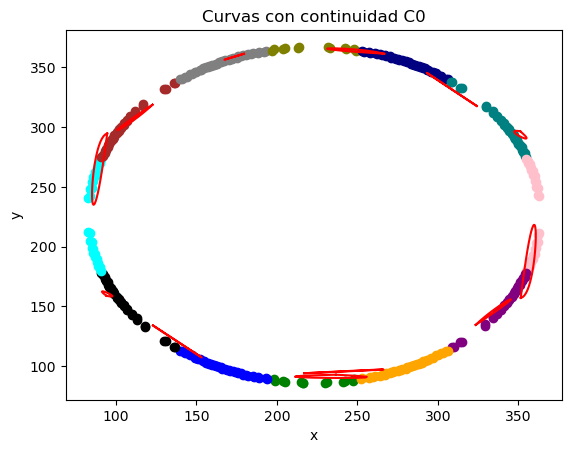

In [254]:
# Volver a graficar, ahora con continuidad C1
for clave in Ds:
    subset = Ds[clave]
    subset = np.array(subset)
    # Graficar los puntos originales de cada grupo
    plt.scatter(subset[:, 0], subset[:, 1], color=colors1[clave], label=f'Datos originales {clave}')

    # Graficar la curva ajustada de cada grupo
    plt.plot(aproximaciones[clave][:, 0], aproximaciones[clave][:, 1], color="red", label=f'Curva ajustada {clave}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
#plt.legend()
plt.title('Curvas con continuidad C0')
plt.show()